In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Markdown
%matplotlib inline

def entropy(P,Hix,nvar=3):
    #given a probability array P,
    #calculate the entropy of variables in set Hix
    Hnot=tuple({k for k in range(nvar)}-Hix)
    Fsum=np.sum(P,axis=Hnot)
    return -np.nansum(Fsum*np.log(Fsum))
  
def dgps(P):
    Hi=np.array([entropy(P,{i}) for i in range(3)])
    Hij=np.array([entropy(P,{0,1,2}-{i}) for i in range(3)])
    HijHjk=np.sum(Hij)-Hij
    Hijk=entropy(P,{0,1,2})
    omega=np.sum(Hi)-Hijk
    if np.isclose(omega,0):
        return np.array([0,0,0]),0
    delta=(-Hi+HijHjk-Hijk)/omega
    return delta,omega

### Example: generate delta-gps plane for all possible functions

In [2]:
a=3

ix=np.array([[k for k in range(a)]]*a)
x=ix.ravel(order='F')
y=ix.ravel(order='C')
D=[]
O=[]

#generate all possible 3-variable functions of alphabet size 'a'
#encoded in a flattened form; e.g. for XOR Z=[0,1,2,1,2,0,2,0,1]
Zlist=np.vstack(list(itertools.product([k for k in range(a)],repeat=a**2)))

for Z in tqdm(Zlist):
    #generate the probability array corresponding to this function
    p=np.zeros((a,a,a))
    p[x,y,Z]=1.0
    p=p/np.sum(p)

    d,o=dgps(p)
    D.append(d)
    O.append(o)
    
D=np.vstack(D)
O=np.array(O)

  0%|          | 0/19683 [00:00<?, ?it/s]/home/jkunert/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/jkunert/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
100%|██████████| 19683/19683 [00:05<00:00, 3633.36it/s]


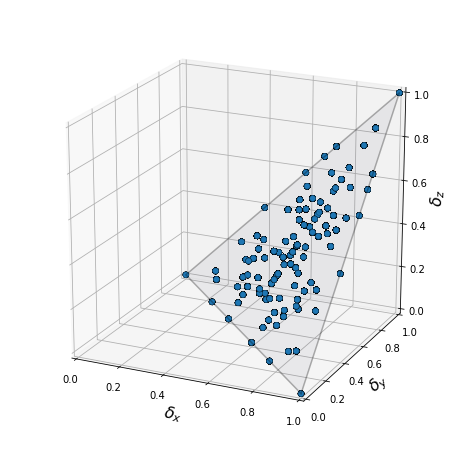

In [3]:
## Plot the Results

#only plot delta values with Omega!=0
Do=D[O!=0]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
#plot the delta plane
ax.plot_trisurf([1,1,0],[0,1,1],[0,1,0],color=[0,0,0.3,0.05])
ax.plot([1,1,0,1],[0,1,1,0],[0,1,0,0],color=[0,0,0,0.3])
#plot the calculated delta values for each function
im = ax.scatter(Do[:,0],Do[:,1],Do[:,2],edgecolors=[0,0,0,0.5],linewidth=0.5,s=35)

#set labels, limits and rotation
plt.xlabel('$\delta_x$',fontsize=16)
plt.ylabel('$\delta_y$',fontsize=16)
ax.set_zlabel('$\delta_z$',fontsize=16)
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
ax.set_zlim([-0.0,1.0])
ax.view_init(20,-65)

### Example: synthetic dataset

In [4]:
#generate 'N' points, let x & y be independent random variables
N=10000
x=np.random.randint(0,3,N)
y=np.random.randint(0,3,N)

#let z=XOR(x,y)
z=(x+y)%3
#...but replace some fraction "noise" with random values
noise=0.8
z[np.random.choice(range(N),int(N*noise),replace=False)]=np.random.randint(0,3,int(N*noise))

#convert x,y,z into a probability array
#where P[i,j,k] is the joint probability of x==i, y==j and z==k
P=np.zeros((3,3,3))
np.add.at(P,[x,y,z],1)
P=P/np.sum(P)

#calculate normalized delta and omega values
d,o=dgps(P)

output='$(\Delta_x,\Delta_y,\Delta_z) = ({:0.3f},{:0.3f},{:0.3f})$\n\n'.format(*(d*o))
output+='$\Omega = {:0.6f}$\n\n'.format(o)
output+='Normalized Delta Values: \n\n $(\delta_x,\delta_y,\delta_z)=({:0.3f},{:0.3f},{:0.3f})$\n\n'.format(*d)


Markdown(output)

$(\Delta_x,\Delta_y,\Delta_z) = (0.038,0.038,0.038)$

$\Omega = 0.038595$

Normalized Delta Values: 

 $(\delta_x,\delta_y,\delta_z)=(0.994,0.997,0.993)$

